# EDA

**train.csv**
|Column|Info.|
|:---:|---|
|id|답변 (QA) 샘플 고유 번호|
|질문_1, 질문_2|샘플 별 동일한 내용으로 구성된 질문 2개|
|category|질문 - 답변 (QA) 샘플의 도메인 세부 분야|
|답변_1, 답변_2, 답변_3, 답변_4, 답변_5|샘플 별 질문에 대한 동일한 답변 Reference 5개|

In [22]:
from collections import Counter
from utils.util import extract_details

import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [23]:
original_df = pd.read_csv('./data/train.csv')

df = original_df.copy()

df

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
0,TRAIN_000,면진장치가 뭐야?,면진장치에 사용되는 주요 기술은 무엇인가요?,건축구조,면진장치란 지반에서 오는 진동 에너지를 흡수하여 건물에 주는 진동을 줄여주는 진동 ...,"면진장치란 건물의 지반에서 발생하는 진동 에너지를 흡수하여 건물을 보호하고, 진동을...",면진장치란 지반으로부터 발생하는 진동 에너지를 흡수하여 건물에 전달되는 진동을 줄여...,면진장치는 건물의 지반으로부터 오는 진동 에너지를 흡수하여 건물에 전달되는 진동을 ...,면진장치는 건물에 오는 지반 진동의 영향을 최대한으로 흡수하여 건물에 전달되는 진동...
1,TRAIN_001,내진설계의 종류 좀 알려줘,내진설계에는 어떤 종류가 있는지 자세히 알려주실 수 있나요?,건축구조,"내진 설계의 종류로 내진구조, 제진구조, 면진구조가 있습니다.","내진설계에는 내진구조, 제진구조, 면진구조가 있습니다. 내진구조는 건물 구조물이 지...","내진설계에는 주로 내진구조, 제진구조, 면진구조의 세 가지 종류가 있습니다. 이들은...","내진설계에는 주로 내진구조, 제진구조, 면진구조가 사용됩니다. 내진구조는 건물 구조...","내진 설계에는 다양한 종류가 있지만, 대표적으로 내진구조, 제진구조, 면진구조가 있..."
2,TRAIN_002,철골구조의 장점이 뭐야?,철골구조의 장점을 알려줘?,건축구조,철골구조는 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건축이 가...,철골구조의 장점은 건물의 외벽에는 그다지 하중이 걸리지 않기 때문에 고층 건물의 건...,철골구조의 장점은 건물의 외벽에 하중이 적게 걸리기 때문에 고층 건물의 건축이 용이...,"철골구조의 장점은 건물의 외벽이 하중이 걸리지 않아 공간 활용이 용이하고, 고층 건...",철골구조의 장점은 건물의 외벽에 하중이 크게 걸리지 않아 고층 건물을 건축할 수 있...
3,TRAIN_003,철골철근 콘크리트 구조가 뭐야?,철골철근 콘크리트 구조의 장점과 단점에는 무엇이 있을까요?,건축구조,"철근철골콘크리트는 철골과 철근, 그리고 콘크리트를 함께 사용하는 건축 구조입니다. ...","철골철근콘크리트 구조는 건축물을 지탱하는 주요 구조물인 철골과 철근, 그리고 콘크리...",철골철근 콘크리트 구조는 건축물을 지탱하기 위한 구조물에서 일반적으로 사용되는 방식...,"철골철근콘크리트 구조는 철골과 철근, 그리고 콘크리트를 함께 사용하여 만들어지는 건...","철골철근 콘크리트 구조는 강철 골조와 강철 철근, 그리고 콘크리트를 함께 사용하여 ..."
4,TRAIN_004,철골구조는 어떤 방식이 있어?,철골구조의 다양한 방식이 무엇인가요?,건축구조,철골구조는 일반철골구조와 경량철골구조가 있습니다.,철골구조는 일반철골구조와 경량철골구조가 있습니다. 일반철골구조는 주로 대형 건물이나...,철골구조는 주로 일반철골구조와 경량철골구조로 나뉘어집니다. 이들은 건축 시스템에 따...,철골구조는 주로 일반철골구조와 경량철골구조로 구분됩니다. 이외에도 최근에는 고층 건...,철골구조는 일반철골구조와 경량철골구조 두 가지 방식이 주로 사용됩니다. 일반철골구조...
...,...,...,...,...,...,...,...,...,...
639,TRAIN_639,벽장 부위 결로의 원인이 뭐야?,벽장 부위 결로가 발생하는 주된 원인은 무엇일까요?,타 마감하자,벽장 부위 결로의 원인은 난방이 이웃한 방과동일한 조건이 되나 그 방에 비해 저온인...,"벽장 부위 결로의 원인은 주로 난방이 자리잡은 방이 내부 온도가 낮은 반면, 외부 ...",벽장 부위 결로가 발생하는 원인은 난방이 잘 이루어지지 않아 해당 공간이 저온인 반...,"벽장 부위 결로가 발생하는 원인은 난방이 인접한 방과 같은 조건을 갖추고 있지만, ...",벽장 부위 결로의 주된 원인은 충분한 환기가 이루어지지 않는 환경과 과도한 습기가 ...
640,TRAIN_640,"AD, PD에 면한 벽체 결로의 원인이 뭐야?",벽체 결로가 AD나 PD에 면한다면 그 원인이 무엇인가요?,타 마감하자,"AD, PD에 면한 벽체 결로의 원인은 외기에 접하는 면 좌, 우측 벽체에는 단열재...","AD, PD에 면한 벽체 결로의 원인은 외기에 접하는 면 좌, 우측 벽체에는 단열재...","AD, PD에 면한 벽체 결로의 주된 원인은 외기에 접하는 면 좌, 우측 벽체에 단...","AD, PD에 면한 벽체 결로의 원인으로는 외기에 접하는 면 좌, 우측 벽체는 일반...","AD, PD에 면한 벽체 결로의 원인으로는 외부 공기에 노출된 벽면이 실내보다 냉각..."
641,TRAIN_641,외벽 모서리 부위에 결로가 발생하는 원인이 뭐야?,외벽 모서리 부위에 결로가 발생하는 것을 예방하는 방법이 있을까요?,타 마감하자,외벽모서리 부위에 결로가 발생하는 원인은 높은 온도차 때문입니다. 외벽 모서리의 경...,외벽 모서리 부위에 결로가 발생하는 원인은 중요한 역할을 합니다. 외부에 비치는 세...,외벽 모서리 부위에 결로가 발생하는 원인으로는 높은 온도차가 대표적입니다. 외벽 모...,외벽 모서리 부위에 결로가 발생하는 원인은 실내와 외부의 온도차 때문입니다. 외벽 ...,외벽 모서리 부위에 결로가 발생하는 주요 원인은 높은 온도차입니다. 외벽 모서리는 ...
642,TRAIN_642,창호 결로의 대책은 뭐야?,창호 결로를 해결하기 위한 가장 효과적인 방법은 무엇인가요?,타 마감하자,창호결로의 대책은 제품을 선정할 때 KS에 규정된 프레임을 선정하고 유리의 열관류율...,창호 결로의 대책은 KS에 규정된 프레임을 선정하고 유리의 열관류율 및 결로 발생 ...,"창호 결로를 예방하기 위한 대책은 KS에 규정된 프레임을 선택하고, 열관류율이 적은...","창호 결로의 대책은 여러 가지가 있습니다. 먼저, 창호를 선택할 때 KS에 규정된 ...","창호 결로를 방지하기 위한 대책으로는 KS에 규정된 프레임을 사용하고, 열관류율 및..."


Null 값이 없는 걸로 확인(`np.nan`이나 'NULL'과 같은 자체적으로 정한 결측값 포함).

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        644 non-null    object
 1   질문_1      644 non-null    object
 2   질문_2      644 non-null    object
 3   category  644 non-null    object
 4   답변_1      644 non-null    object
 5   답변_2      644 non-null    object
 6   답변_3      644 non-null    object
 7   답변_4      644 non-null    object
 8   답변_5      644 non-null    object
dtypes: object(9)
memory usage: 45.4+ KB


In [25]:
df.describe(include='all')

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
count,644,644,644,644,644,644,644,644,644
unique,644,643,643,7,643,644,644,644,644
top,TRAIN_000,장판의 장점이 뭐야?,오리지널징크의 장점은 무엇인가요?,마감재,누수에 의해 도배지가 젖어 있는 상태가 지속되면 곰팡이가 발생할 수 있습니다.,"면진장치란 건물의 지반에서 발생하는 진동 에너지를 흡수하여 건물을 보호하고, 진동을...",면진장치란 지반으로부터 발생하는 진동 에너지를 흡수하여 건물에 전달되는 진동을 줄여...,면진장치는 건물의 지반으로부터 오는 진동 에너지를 흡수하여 건물에 전달되는 진동을 ...,면진장치는 건물에 오는 지반 진동의 영향을 최대한으로 흡수하여 건물에 전달되는 진동...
freq,1,2,2,272,2,1,1,1,1


마감재       272
인테리어      123
시공        111
마감하자       60
건축구조       31
기타         27
타 마감하자     20
Name: category, dtype: int64


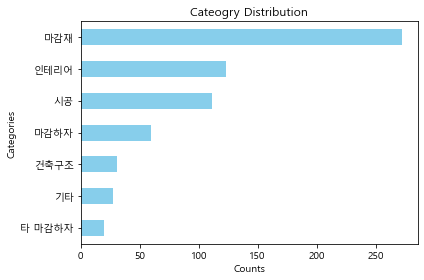

In [26]:
df_category_counts = df['category'].value_counts()

print(df_category_counts)

df_category_counts.sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title('Cateogry Distribution')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.tight_layout()
plt.show()

질문, 답변 모두 유사한 분포를 보이고, 대체로 짧은 길이에서 높은 빈도를 보임.

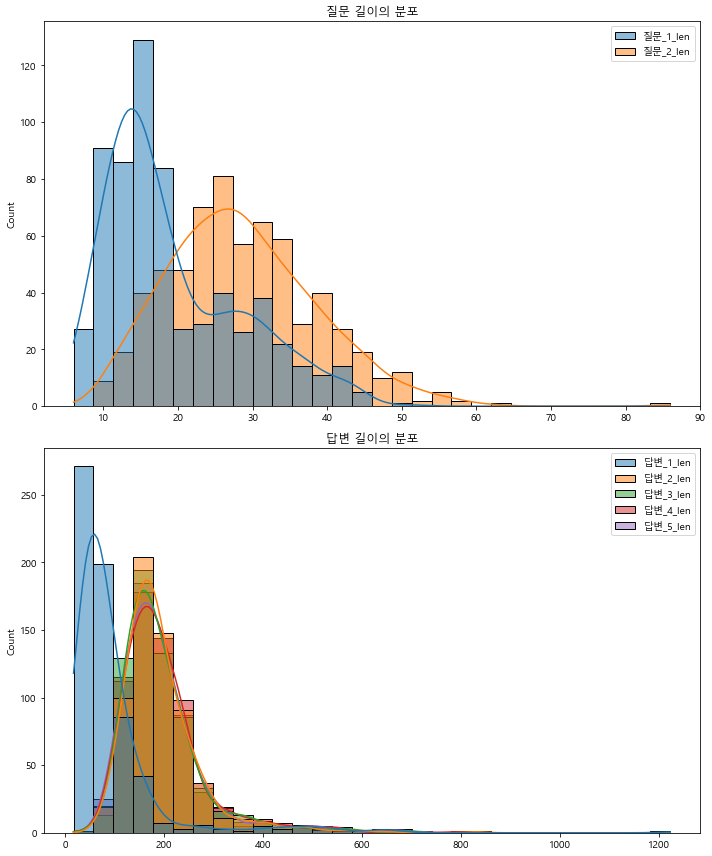

In [27]:
df['질문_1_len'] = df['질문_1'].apply(len)
df['질문_2_len'] = df['질문_2'].apply(len)
answer_cols = ['답변_1', '답변_2', '답변_3', '답변_4', '답변_5']
for col in answer_cols:
    df[f'{col}_len'] = df[col].apply(len)

fig, ax = plt.subplots(2, 1, figsize=(10, 12))
sns.histplot(df[['질문_1_len', '질문_2_len']], ax=ax[0], bins=30, kde=True)
ax[0].set_title('질문 길이의 분포')
sns.histplot(df[[f'{col}_len' for col in answer_cols]], ax=ax[1], bins=30, kde=True)
ax[1].set_title('답변 길이의 분포')
plt.tight_layout()
plt.show()

유사도가 큰 질문과 답변이 있으므로, 학습을 시킬 때 주의해야 할 것 같음.

In [34]:
detailed = extract_details(df)

detailed

[{'유사도': 1.0000000000000004,
  '질문1_1': '초배작업이 뭐야?',
  '질문1_2': '초배작업은 무엇을 의미하나요?',
  '질문2_1': '초배작업이 뭐야?',
  '질문2_2': '초배작업은 무엇을 의미하나요?',
  '답변1_1': '도배를 위한 기초작업으로 부직포, 운용지, 네바리 등의 시공을 통틀어 초배작업이라고 합니다.',
  '답변2_1': '도배를 위한 기초작업으로 부직포, 운용지, 네바리 등의 시공을 통틀어 초배작업이라고 합니다.',
  '답변1_2': '초배작업은 도배를 하기 전에 벽면에 시행하는 작업으로, 부직포, 운용지, 네바리 등의 재료를 사용하여 벽면을 튼튼하게 만들고 표면을 매끈하게 다듬는 작업을 말합니다. 이러한 작업은 도배 작업을 시작하기 전의 필수적인 단계로, 벽면을 적절하게 준비하여 도배 작업의 품질을 높이고 마감재의 단단한 부착을 돕습니다.',
  '답변2_2': '초배작업은 도배를 하기 전에 벽면에 시행하는 작업으로, 부직포, 운용지, 네바리 등의 재료를 사용하여 벽면을 튼튼하게 만들고 표면을 매끈하게 다듬는 작업을 말합니다. 이러한 작업은 도배 작업을 시작하기 전의 필수적인 단계로, 벽면을 적절하게 준비하여 도배 작업의 품질을 높이고 마감재의 단단한 부착을 돕습니다.',
  '답변1_3': '초배작업은 도배 작업을 하기 전에 필요한 기초작업을 말합니다. 보통 부직포, 운용지, 네바리 등을 시공하여 벽면을 매끄럽게 만들고 도배 작업을 준비하는 단계를 포괄적으로 말합니다. 이러한 과정을 통해 도배 작업의 품질을 높이고 마감재의 밀착력을 향상시킬 수 있습니다.',
  '답변2_3': '초배작업은 도배 작업을 하기 전에 필요한 기초작업을 말합니다. 보통 부직포, 운용지, 네바리 등을 시공하여 벽면을 매끄럽게 만들고 도배 작업을 준비하는 단계를 포괄적으로 말합니다. 이러한 과정을 통해 도배 작업의 품질을 높이고 마감재의 밀착력을 향상시킬 수 있습니다.',
  '답변1_4': '초배작업은 도배 작업을 

In [30]:
text_columns = ['질문_1', '질문_2', '답변_1', '답변_2', '답변_3', '답변_4', '답변_5']

def simple_tokenize(text):
    tokens = re.findall(r'[가-힣]+', text)
    return tokens

simple_tokens = []
for column in text_columns:
    df[column].apply(lambda x: simple_tokens.extend(simple_tokenize(x)))

simple_token_counts = Counter(simple_tokens)

most_common_simple_tokens = simple_token_counts.most_common(20)
most_common_simple_tokens

[('있습니다', 3341),
 ('수', 3309),
 ('또한', 1351),
 ('것이', 1312),
 ('합니다', 1130),
 ('이러한', 804),
 ('있는', 724),
 ('및', 628),
 ('좋습니다', 498),
 ('다양한', 497),
 ('중요합니다', 494),
 ('발생할', 479),
 ('공간을', 458),
 ('경우', 457),
 ('주로', 454),
 ('때', 415),
 ('통해', 411),
 ('인해', 406),
 ('따라', 398),
 ('위해', 364)]